# Google Drive をマウントする

In [1]:
# 必要なライブラリを読み込む
from google.colab import drive 

# Google ドライブをマウントする
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


必要なモジュールをインポートします。

*   pandas：表データの前処理・集計に便利な型「データフレーム」を提供してくれるライブラリ
*   sklearn：Scikit-learn。pythonで機械学習を実行するために便利なモジュールを集めてあるパッケージ。今回は以下のモジュールを使用する。
> *   model_selection：モデル構築を実施する際に便利なモジュールがいくつか用意されています。今回はtrain_test_split（データを訓練用データと検証用データに分解する）をインポートします。
> *   SVM：サポートベクターマシン構築に必要なモジュールがいくつか用意されています。今回はSVC（サポートベクターマシンによる分類器）をインポートします。
> *   metrics：モデル憲章を実施する際に便利なモジュールがいくつか用意されています。今回はaccuracy_score（正解率計算用モジュール）とconfusion_matrix（混合行列作成用モジュール）、roc_curve（ROC曲線作成用モジュール）、auc（AUC計算用モジュール）をインポートします。
*   imblearn：不均衡データを分析するために使われるライブラリ
> *   under_sampling：アンダーサンプリングを実施するためのモジュール。RandomUnderSamplerというメソッドが実装されている。
*   matplotlib：pythonでグラフ描画に使われるライブラリ
*   seaborn：pythonでグラフ描画に使われるライブラリ（matplotlibより美しい）

In [2]:
# 必要なライブラリを読み込む

# データフレームが扱えるよう、pandas をインポート
import pandas as pd

# numpy のデータが扱えるよう、numpy をインポート
import numpy as np

# データ分割を行う便利なモジュール train_test_split をインポート
from sklearn.model_selection import train_test_split

# アンダーサンプリング用ライブラリをインポート
from imblearn.under_sampling import RandomUnderSampler

# データの標準化を行うためのモジュールをインポート
from sklearn.preprocessing import StandardScaler

# サポートベクターマシンを行うためのモジュールをインポート
from sklearn.svm import SVC

# ヒストグラムを描くためのモジュールをインポート
import matplotlib.pyplot as plt
import seaborn as sns

# 正解率を作成するためのモジュールをインポート
from sklearn.metrics import accuracy_score

# 混合行列を作成するためのモジュールをインポート
from sklearn.metrics import confusion_matrix

# ROCを作成するためのモジュールをインポート
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 準備

# データ読み込み

あるシステムの状況を1時間おきにモニタリングしているデータになります（machineTrouble.csv）。ここでは、このデータをつかってシステムトラブル（Troubleが1）の発生を予測するという課題に取り組んでいただきます。
*   説明変数（システムのモニタリングデータ）
> *   Instrument1～Instrument48：装置1～48についている計器の値（負荷をモニタリングしています。）
> *   Hub1～17：装置同士を接続しているハブ1～17についている計器の値（負荷をモニタリングしています。）
*   目的変数（システムトラブルの発生）
> *   Trouble：モニタリングのタイミングから1時間以内にシステム上の異常が発生したか否かをフラグ化したもの（1の際にシステム異常が発生）

In [3]:
# システムのモニタリングデータを読み込む
machineTrouble = pd.read_csv("drive/My Drive/DATA-SCI-TECH-EXERCISE/DATA/machineTrouble.csv")
machineTrouble.head()

,SystemID,Instrument1,Instrument2,Instrument3,Instrument4,Instrument5,Instrument6,Instrument7,Instrument8,Instrument9,Instrument10,Instrument11,Instrument12,Instrument13,Instrument14,Instrument15,Instrument16,Instrument17,Instrument18,Instrument19,Instrument20,Instrument21,Instrument22,Instrument23,Instrument24,Instrument25,Instrument26,Instrument27,Instrument28,Instrument29,Instrument30,Instrument31,Instrument32,Instrument33,Instrument34,Instrument35,Instrument36,Instrument37,Instrument38,Instrument39,Instrument40,Instrument41,Instrument42,Instrument43,Instrument44,Instrument45,Instrument46,Instrument47,Instrument48,Hub1,Hub2,Hub3,Hub4,Hub5,Hub6,Hub7,Hub8,Hub9,Hub10,Hub11,Hub12,Hub13,Hub14,Hub15,Hub16,Hub17,Trouble
0,SYS02163966710,123.96,1.099,319.31,12.21,7931.09,6.056,2749.18,23.05,64.521,1022.74,2474.78,389.31,12.62,3738.13,6.051,5413.632,603.27,6017.66,439.710,227.41,56.039,6354.99,28.06,222.911,5074.80,4102.19,856.72,3173.93,11.441,50.01,24.455,24041.81,6.76,67.61,731.31,58.258,44.07,1.119,397.93,56056.92,17.34,206.828,2126.58,0.108,34986.36,0.111,7.40,4375.89,0.134,0.379,0.46,0.68,0.85,0.49,0.58,0.049,0.94,0.20,0.168,0.85,0.87,0.67,0.403,0.19,0.01,0
1,SYS03084177854,119.35,1.112,316.72,15.95,2121.01,7.216,5538.29,21.91,60.097,1136.52,2599.53,370.97,22.07,3522.49,6.373,3745.059,626.52,410.27,278.008,130.43,113.998,7247.99,6.18,137.882,4666.63,2570.16,720.58,91.66,7.955,24.54,17.081,30217.71,10.94,91.07,448.35,51.476,20.97,1.095,520.54,53540.23,45.02,147.304,2359.42,0.121,35683.81,0.133,9.69,2023.61,0.127,0.351,0.24,0.61,0.73,0.43,0.34,0.041,0.78,0.52,0.156,0.99,0.32,0.46,0.331,0.31,0.51,0
2,SYS01466328054,119.38,1.108,329.50,10.80,6811.12,6.059,5567.30,40.24,28.606,903.23,3076.69,336.93,24.68,3492.18,5.301,12708.031,710.49,5922.89,379.735,231.85,34.967,8338.09,7.16,247.971,4405.50,1887.08,780.77,1310.56,6.224,29.75,12.481,24731.61,4.53,52.91,592.34,34.863,22.89,1.095,516.51,56416.50,56.46,134.097,2087.25,0.130,34488.48,0.149,5.83,1917.21,0.106,0.363,0.36,0.78,0.36,0.28,0.31,0.039,0.83,0.61,0.123,1.00,0.33,1.00,0.379,0.38,0.29,0
3,SYS09259268556,117.40,1.104,330.72,11.17,3494.39,6.110,5390.78,37.77,66.864,1102.40,1859.76,377.44,22.92,3798.70,7.098,1227.014,853.62,5548.02,287.096,201.50,80.449,7099.88,13.79,186.555,3979.02,2723.10,636.97,2920.15,8.038,48.07,19.987,22987.46,6.49,191.03,599.41,67.175,41.57,1.118,976.51,64370.27,12.13,111.763,2300.85,0.161,34180.88,0.138,9.35,3600.21,0.122,0.307,0.55,0.49,0.79,0.57,0.78,0.034,0.90,0.37,0.136,0.94,0.49,1.00,0.356,0.27,0.21,0
4,SYS04922251152,118.44,1.104,316.32,12.71,1780.26,10.283,4382.64,38.21,40.328,1500.34,2465.08,301.50,13.16,3574.25,10.198,4869.360,549.64,1421.76,208.030,154.78,42.702,9729.81,11.23,127.111,3193.03,5037.60,675.22,240.46,5.917,21.53,21.984,23516.11,7.83,119.82,548.74,84.649,36.48,1.114,1050.00,47365.83,31.39,195.408,2043.10,0.109,35360.42,0.099,5.82,3088.20,0.154,0.311,0.05,0.78,0.66,0.47,0.59,0.042,0.79,0.47,0.127,0.80,0.50,0.89,0.457,0.40,0.99,0


In [4]:
# 概要を確認
machineTrouble.describe()

,Instrument1,Instrument2,Instrument3,Instrument4,Instrument5,Instrument6,Instrument7,Instrument8,Instrument9,Instrument10,Instrument11,Instrument12,Instrument13,Instrument14,Instrument15,Instrument16,Instrument17,Instrument18,Instrument19,Instrument20,Instrument21,Instrument22,Instrument23,Instrument24,Instrument25,Instrument26,Instrument27,Instrument28,Instrument29,Instrument30,Instrument31,Instrument32,Instrument33,Instrument34,Instrument35,Instrument36,Instrument37,Instrument38,Instrument39,Instrument40,Instrument41,Instrument42,Instrument43,Instrument44,Instrument45,Instrument46,Instrument47,Instrument48,Hub1,Hub2,Hub3,Hub4,Hub5,Hub6,Hub7,Hub8,Hub9,Hub10,Hub11,Hub12,Hub13,Hub14,Hub15,Hub16,Hub17,Trouble
count,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000
mean,119.997982,1.105113,322.882939,12.003611,5081.888750,7.526592,4280.821682,41.013230,59.130555,1239.894181,2184.176365,344.608588,18.090897,3622.083721,7.536204,12328.229210,624.233451,3282.272528,482.892338,204.047236,59.121033,7471.680632,14.914633,168.296436,3879.757119,3841.901669,764.976174,2219.429638,7.551094,23.996371,20.993003,23889.900230,7.008702,123.366961,577.691644,58.963442,36.024137,1.105251,771.390657,58632.650058,25.201446,168.549866,2173.929124,0.138046,34805.383809,0.137978,9.962499,3234.000204,0.138315,0.369853,0.491539,0.652254,0.599687,0.567883,0.500309,0.052034,0.849490,0.398853,0.137914,0.891498,0.499190,0.711208,0.369746,0.299513,0.501068,0.035982
std,1.983602,0.011104,11.936357,2.018746,1994.600252,1.527129,1081.995545,10.024241,24.371488,214.160385,884.285569,42.998826,6.064157,311.435345,1.530530,13692.058742,122.937476,1690.040510,321.467748,45.067530,24.416439,1479.171452,6.654676,90.434506,759.160671,1476.956745,99.939477,1221.294957,1.524949,9.739304,6.553899,3505.819488,2.644138,40.884451,120.354822,24.509468,12.055274,0.011163,277.028350,15403.703228,11.351305,88.790532,168.231981,0.028088,826.488585,0.028172,3.131870,767.928860,0.027946,0.037255,0.285721,0.144767,0.149334,0.273345,0.173370,0.015766,0.050035,0.196158,0.028002,0.087547,0.288458,0.254973,0.037143,0.050480,0.289721,0.186254
min,111.580000,1.065000,278.400000,4.290000,1625.230000,3.390000,2398.870000,5.350000,11.157000,410.140000,659.130000,181.600000,3.690000,3083.620000,3.213000,288.982000,196.210000,320.690000,31.758000,127.150000,12.195000,1407.070000,1.320000,21.981000,796.440000,1278.220000,349.940000,82.160000,3.370000,2.500000,6.768000,10009.440000,0.780000,52.160000,116.020000,12.241000,6.580000,1.066000,286.860000,7623.130000,1.610000,20.531000,1881.550000,0.061000,31527.590000,0.064000,1.730000,1904.130000,0.066000,0.248000,-0.660000,0.400000,0.070000,0.010000,0.200000,0.017000,0.660000,0.020000,0.063000,0.500000,0.000000,0.050000,0.235000,0.110000,0.000000,0.000000
25%,118.660000,1.098000,314.847500,10.640000,3345.810000,6.448000,3343.927500,34.200000,41.758250,1095.245000,1417.855000,315.762500,13.670000,3354.230000,6.446000,4430.668250,538.195000,1827.002500,268.819750,164.855000,41.743750,6474.400000,10.060000,105.873750,3372.425000,2569.725000,697.297500,1173.435000,6.464750,16.870000,16.340750,21550.860000,5.100000,88.077500,495.135000,41.831250,27.360000,1.0

# データ準備
* データ分割（モデル構築用・モデル検証用）
* アンダーサンプリングによる不均衡データ対応
* 標準化

**データ分割**  
モデルを構築をする際はデータを訓練用（モデルのパラメータを決める）と検証用（構築されたモデルに投入して、訓練用データを投入した際の精度と同程度の精度が得られるかを確認する）に分解します。

train_test_split 関数は説明変数と目的変数を投入する事し、全データのうちどの程度の割合を検証用データにするかを指定する事でランダムな分離を行ってくれます。

In [5]:
# 説明変数と目的変数に分離する
columnList = machineTrouble.columns.to_list()
columnList.remove("SystemID")
columnList.remove("Trouble")
X = pd.DataFrame( machineTrouble.loc[:, columnList] )
y = pd.DataFrame( machineTrouble.loc[:, ["Trouble"]] )

# データを訓練用データ・検証用データに分ける（訓練用：検証用＝7:3）
(X_train, X_test ,y_train, y_test) = train_test_split(X, y, test_size = 0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7840, 65)
(7840, 1)
(3360, 65)
(3360, 1)


**アンダーサンプリング**  
不均衡データ（0と1がアンバランス）な場合、比率を調整しておくことで、Precision や Recall が悪いモデルが構築されるのを避ける事ができます。

RandomUnderSampler メソッドは 0 と 1 の比率を予め指定してから、説明変数・目的変数をセットで入力すると、指定した比率にサンプリングしたデータを返してくれます。

In [6]:
# アンダーサンプリングを行う

# 正例の数を保存
positive_count_train = int(y_train["Trouble"].sum())

# 正例が20％になるまで負例をアンダーサンプリング
rus = RandomUnderSampler(ratio={0:positive_count_train*4, 1:positive_count_train}, random_state=1234)

# 学習用データに反映
X_train_rs, y_train_s = rus.fit_sample(X_train, y_train)
X_train_rs = pd.DataFrame(X_train_rs, columns=columnList)
y_train_rs = pd.DataFrame(y_train_s,columns=["Trouble"])
print(rus)
print(X_train_rs.shape)
print(y_train_rs.shape)

RandomUnderSampler(random_state=1234, ratio={0: 1128, 1: 282},
                   replacement=False, return_indices=False,
                   sampling_strategy={0: 1128, 1: 282})
(1410, 65)
(1410, 1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


**変数の標準化**  
各変数、当該変数の平均値を引いてから、当該変数の標準偏差で割ります。（標準化）
変数のスケールを揃えるために実行しています。

In [7]:
# 説明変数を標準化（平均0、標準偏差1となるように変数変換）する

sclr_X = StandardScaler()
sclr_X.fit(X_train_rs)
X_train_rs_std = sclr_X.transform(X_train_rs)
X_train_std = sclr_X.transform(X_train)
X_test_std = sclr_X.transform(X_test)

# モデル構築（線形で実施。カーネルトリックを使わない。）

SVMで線形判別モデルをつくります。
SVMでモデルを作成するときは、以下のパラメータを（一部でいいので）設定する必要があります。
*   C：ソフトマージンの厳しさを表すパラメータ（デフォルト1.0、データ解析者が決めるハイパーパラメータ）
*   kernel：カーネル関数を指定する（カーネルトリックを使わない際は linear、使う際は rbf などを指定する）
*   gamma：カーネルトリックを使う際のパラメータ（、データ解析者が決めるハイパーパラメータ）
*   probability：確率をアウトプットする際はTrueにする。（デフォルトFalse）

モデルは訓練用データで構築します（X_train_rs_std、y_train_rs）。

In [8]:
# SVMを実施し、判別モデルを構築する
clf = SVC(C=10, kernel='linear', probability=True, random_state=1234)
clf.fit(X_train_rs_std,y_train_rs)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=1234, shrinking=True, tol=0.001,
    verbose=False)

# 結果確認

構築されたモデルを確認します。

In [9]:
# 判別モデルの係数を取得する
i = 0
for val in columnList:
    if i > 0:
        preStr = " + "
    else:
        preStr = ""
    print(preStr + str(round(clf.coef_[0][i],4)) + " * "+ val + "(std)")
    i = i + 1
print(" + " + str(clf.intercept_) + " (intercept)")

-0.0198 * Instrument1(std)
 + 0.0382 * Instrument2(std)
 + -0.0117 * Instrument3(std)
 + -0.0414 * Instrument4(std)
 + -0.0575 * Instrument5(std)
 + 0.0475 * Instrument6(std)
 + 0.0222 * Instrument7(std)
 + -0.0847 * Instrument8(std)
 + -0.0714 * Instrument9(std)
 + -0.0181 * Instrument10(std)
 + -0.1464 * Instrument11(std)
 + -0.0531 * Instrument12(std)
 + 0.0417 * Instrument13(std)
 + 0.0871 * Instrument14(std)
 + -0.1692 * Instrument15(std)
 + -0.2257 * Instrument16(std)
 + 0.0285 * Instrument17(std)
 + -0.1015 * Instrument18(std)
 + 0.0 * Instrument19(std)
 + -0.0326 * Instrument20(std)
 + 0.0264 * Instrument21(std)
 + -0.2758 * Instrument22(std)
 + -0.0696 * Instrument23(std)
 + -0.0678 * Instrument24(std)
 + -0.0548 * Instrument25(std)
 + -0.0635 * Instrument26(std)
 + 0.0336 * Instrument27(std)
 + 0.0414 * Instrument28(std)
 + -0.0039 * Instrument29(std)
 + 0.0346 * Instrument30(std)
 + 0.0201 * Instrument31(std)
 + 0.0153 * Instrument32(std)
 + -0.0722 * Instrument33(std)
 + 0.

訓練用データ・検証用データの双方で精度を確認する。
*   正解率を確認する
*   混合行列を確認する

In [10]:
# 精度検証を行う（訓練用データを確認）
print(accuracy_score(y_train_rs, clf.predict(X_train_rs_std)))
conf_mtrx_df = pd.DataFrame(confusion_matrix(y_train_rs,clf.predict(X_train_rs_std).reshape(-1,1)))
conf_mtrx_df.rename(columns={0: 'predict(0)',1: 'predict(1)'}, index={0: 'target(0)',1: 'target(1)'})

0.8425531914893617


,predict(0),predict(1)
target(0),1092,36
target(1),186,96


In [11]:
# 精度検証を行う（訓練用データを確認）
print(accuracy_score(y_train, clf.predict(X_train_std)))
conf_mtrx_df = pd.DataFrame(confusion_matrix(y_train,clf.predict(X_train_std).reshape(-1,1)))
conf_mtrx_df.rename(columns={0: 'predict(0)',1: 'predict(1)'}, index={0: 'target(0)',1: 'target(1)'})

0.932015306122449


,predict(0),predict(1)
target(0),7211,347
target(1),186,96


In [12]:
# 精度検証を行う（検証用データを確認）
print(accuracy_score(y_test, clf.predict(X_test_std)))
conf_mtrx_df = pd.DataFrame(confusion_matrix(y_test,clf.predict(X_test_std).reshape(-1,1)))
conf_mtrx_df.rename(columns={0: 'predict(0)',1: 'predict(1)'}, index={0: 'target(0)',1: 'target(1)'})

0.9229166666666667


,predict(0),predict(1)
target(0),3054,185
target(1),74,47


AUC(train): 0.8164989799920802
AUC(test): 0.8098586697761527
AUC ratio(train/test): 1.0081993444828625


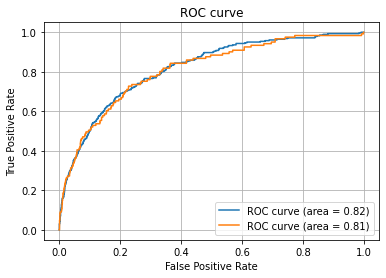

In [13]:
# 精度検証を行う

# 訓練用データについて

# FPR、TPR、（閾値）、AUCを算出
y_train_predict = clf.predict_proba(X_train_std)[:, 1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)
auc_value_train = auc(fpr_train, tpr_train)
# ROC曲線をプロット
plt.plot(fpr_train, tpr_train, label='ROC curve (area = %.2f)'%auc_value_train)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC(train): "+str(auc_value_train))

# 検証用データについて

# FPR、TPR、（閾値）、AUCを算出
y_test_predict = clf.predict_proba(X_test_std)[:, 1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_predict)
auc_value_test = auc(fpr_test, tpr_test)
# ROC曲線をプロット
plt.plot(fpr_test, tpr_test, label='ROC curve (area = %.2f)'%auc_value_test)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC(test): "+str(auc_value_test))
print("AUC ratio(train/test): "+str(auc_value_train/auc_value_test))

# モデル構築（カーネルトリックを使う。）

SVMで線形判別モデルをつくります。
SVMでモデルを作成するときは、以下のパラメータを（一部でいいので）設定する必要があります。
*   C：ソフトマージンの厳しさを表すパラメータ（デフォルト1.0、データ解析者が決めるハイパーパラメータ）
*   kernel：カーネル関数を指定する（カーネルトリックを使わない際は linear、使う際は rbf などを指定する）
*   gamma：カーネルトリックを使う際のパラメータ（、データ解析者が決めるハイパーパラメータ）
*   probability：確率をアウトプットする際はTrueにする。（デフォルトFalse）

モデルは訓練用データで構築します（X_train_rs_std、y_train_rs）。

In [14]:
# SVMを実施し、判別モデルを構築する
clf = SVC(C=10, kernel='rbf', gamma=0.005, probability=True, random_state=5678)
clf.fit(X_train_rs_std,y_train_rs)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=True, random_state=5678, shrinking=True, tol=0.001,
    verbose=False)

# 結果確認

構築されたモデルを確認しても、直感的な理解は困難です（coefは出せますが…）

In [15]:
# 判別モデルの係数を取得しても解釈は不可能（カーネルトリックを使っているため）
print(clf.dual_coef_)

[[-1.00000000e+01 -5.80031267e+00 -8.74101268e+00 -1.06158215e-02
  -3.59582323e-01 -3.70735158e+00 -1.17911784e+00 -4.81204092e+00
  -3.35402262e+00 -6.27904302e+00 -4.74630080e+00 -5.33866388e+00
  -4.90318732e+00 -7.66207755e+00 -1.39023590e+00 -6.42433728e+00
  -3.60890812e-01 -1.58358551e+00 -8.03128202e-01 -1.59681686e+00
  -8.46008490e-01 -3.50671427e+00 -6.19683651e+00 -2.03488125e+00
  -1.00000000e+01 -1.61086268e+00 -4.30881335e-01 -7.47875396e+00
  -1.00000000e+01 -1.45497132e+00 -1.23794067e+00 -2.70827212e+00
  -1.67131990e+00 -7.89823142e+00 -1.23009903e+00 -3.05209935e+00
  -2.39064219e+00 -8.37665143e-01 -3.49268453e-01 -1.75276658e+00
  -4.22122906e+00 -1.17494078e+00 -3.47795269e+00 -1.00000000e+01
  -3.17117422e+00 -1.00000000e+01 -4.16256227e+00 -6.87794005e-02
  -2.22825728e+00 -5.92274032e-01 -5.28000579e-01 -5.19340521e+00
  -2.82319673e+00 -3.46090816e+00 -6.19420573e+00 -8.80021245e-01
  -4.18486497e-01 -8.36081591e-01 -8.17293126e-01 -8.76225859e+00
  -1.00000

訓練用データ・検証用データの双方で精度を確認する。
*   正解率を確認する
*   混合行列を確認する

In [16]:
# 精度検証を行う（訓練用データを確認）
print(accuracy_score(y_train_rs, clf.predict(X_train_rs_std)))
conf_mtrx_df = pd.DataFrame(confusion_matrix(y_train_rs,clf.predict(X_train_rs_std).reshape(-1,1)))
conf_mtrx_df.rename(columns={0: 'predict(0)',1: 'predict(1)'}, index={0: 'target(0)',1: 'target(1)'})

0.9879432624113476


,predict(0),predict(1)
target(0),1128,0
target(1),17,265


In [17]:
# 精度検証を行う（アンダーサンプリング前の訓練用データを確認）
print(accuracy_score(y_train, clf.predict(X_train_std)))
conf_mtrx_df = pd.DataFrame(confusion_matrix(y_train,clf.predict(X_train_std).reshape(-1,1)))
conf_mtrx_df.rename(columns={0: 'predict(0)',1: 'predict(1)'}, index={0: 'target(0)',1: 'target(1)'})

0.9553571428571429


,predict(0),predict(1)
target(0),7225,333
target(1),17,265


In [18]:
# 精度検証を行う（検証用データを確認）
print(accuracy_score(y_test, clf.predict(X_test_std)))
conf_mtrx_df = pd.DataFrame(confusion_matrix(y_test,clf.predict(X_test_std).reshape(-1,1)))
conf_mtrx_df.rename(columns={0: 'predict(0)',1: 'predict(1)'}, index={0: 'target(0)',1: 'target(1)'})

0.9235119047619048


,predict(0),predict(1)
target(0),3039,200
target(1),57,64


AUC(train): 0.9869034079712634
AUC(test): 0.8909596115523872
AUC ratio(train/test): 1.1076859098603875


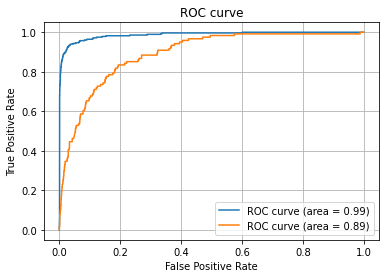

In [19]:
# 精度検証を行う②

# 訓練用データについて

# FPR、TPR、（閾値）、AUCを算出
y_predict = clf.predict_proba(X_train_std)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_predict)
auc_value_train = auc(fpr, tpr)
# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc_value_train)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC(train): "+str(auc_value_train))

# 検証用データについて

# FPR、TPR、（閾値）、AUCを算出
y_predict = clf.predict_proba(X_test_std)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
auc_value_test = auc(fpr, tpr)
# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc_value_test)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC(test): "+str(auc_value_test))
print("AUC ratio(train/test): "+str(auc_value_train/auc_value_test))